# Predicting heart disease using machine learning

Predecting wheather or not someone has heart disease based on their medical attribution

We're going to take the following approach:
- Problem defination
- Data
- Evaluation
- Features
- Modelling
- Experimentation

## 1. Problem defination

> Given the clicical paramters of the patients, can we predict wheather or not they have heart disease

## 2. Data

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

## 3. Evaluation

> If we can reach 95% of accuracy on predicting wheather or not a patient have a heart disease during the proof of concept then we will proceed witht the project

## 4. Features

This is where u get differernt information about each of the feature of our data.

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## Prepareing the tools

We are going to use Pandas, Numpy and Matplotlib for data analysis and manipulation

In [131]:
# Import all the tools that we need

# Regular EDA (Exploratory data analysis) plotting library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from sklearn(scikit-learn)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

#Model Evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay



## Load Data

In [3]:
df = pd.read_csv("heart-disease.csv")
df.shape
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration (exploratory data analysis or EDA)

- What question(s) are you trying to solve?
- What kind of data do we have and how can we treat different types?
- What's missing from data and how do we deal with it?
- Where are the outliers and why should we care about them?
- How can you add, change or remove feature to get more out of your data?
  

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
 df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

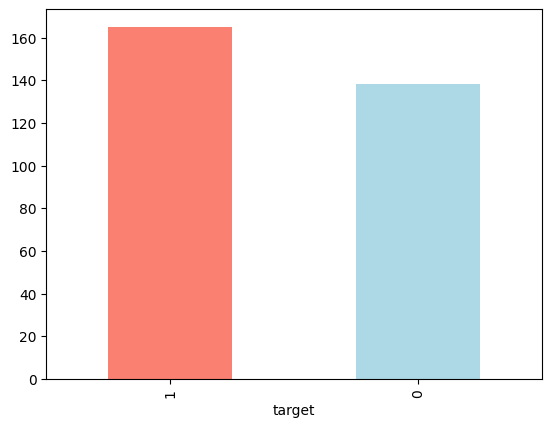

In [7]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [14]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [15]:
#compare target column with sex column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


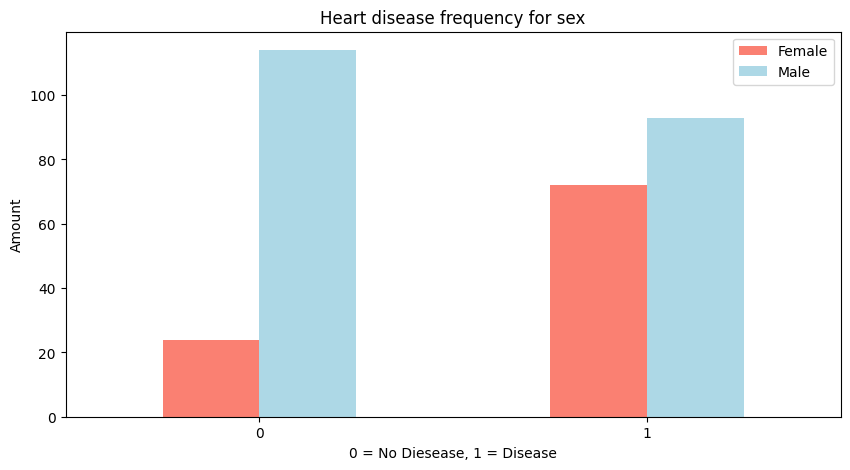

In [16]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 5), color=["salmon", "lightblue"])
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.show()

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [19]:
pd.crosstab(df.target, df.thalach)

thalach,71,88,90,95,96,97,99,103,105,106,...,184,185,186,187,188,190,192,194,195,202
target,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,2,2,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,1,0,...,1,1,2,1,1,1,1,1,0,1


In [20]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

In [21]:
df.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

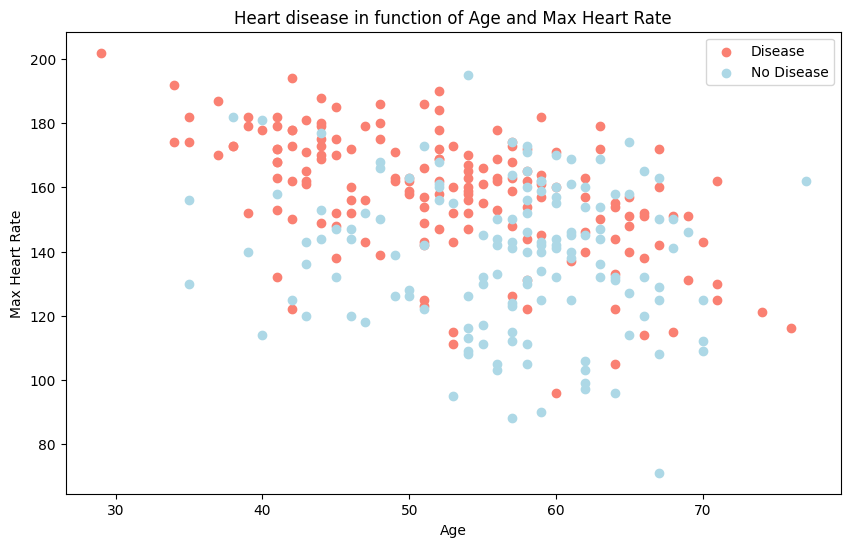

In [22]:
## Age vs thalch for the target value

plt.figure(figsize=(10, 6))

plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="salmon")

plt.scatter(df.age[df.target==0], df.thalach[df.target==0] , c="lightblue")

plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

plt.show()

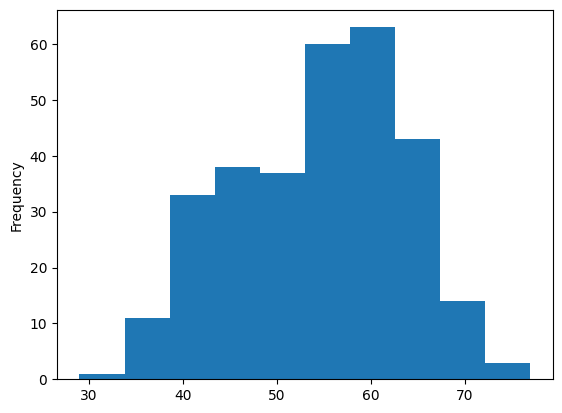

In [23]:
df.age.plot.hist()

plt.show()

## Comparing chest pain with heart disease rate

In [24]:
pd.crosstab(df.cp, df.target)


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


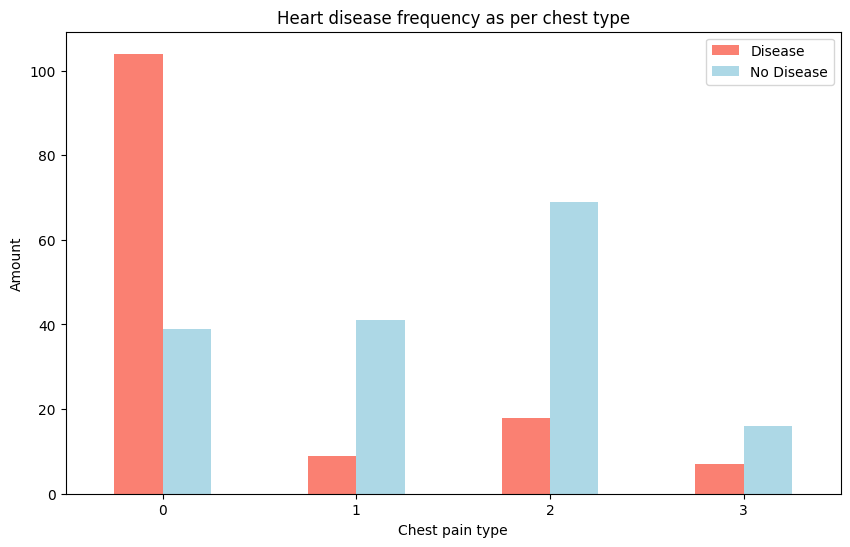

In [25]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart disease frequency as per chest type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["Disease", "No Disease"])
plt.xticks(rotation=0)
plt.show()

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


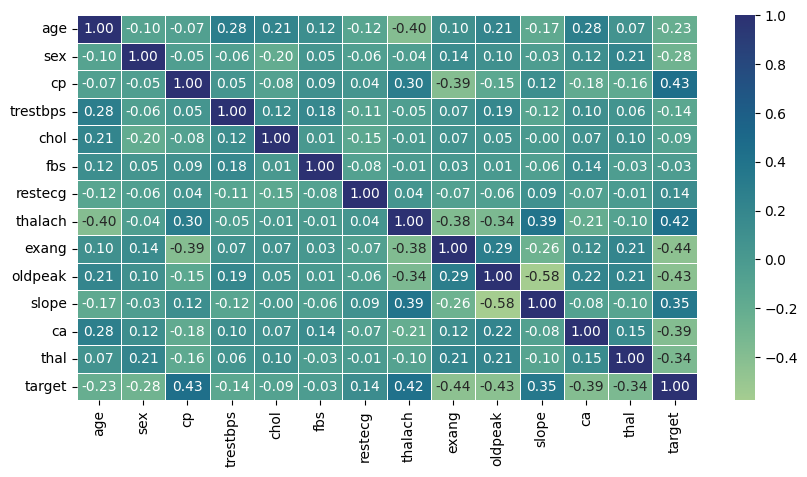

In [28]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="crest", ax=ax)

plt.show()

## Modeling

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
X = df.drop("target", axis=1)

In [31]:
y=df["target"]

In [32]:
X.head(), y.head()

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  
 0   0     1  
 1   0     2  
 2   0     2  
 3   0     2  
 4   0     2  ,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64)

In [33]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [35]:
X_test


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [36]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

We are going to try three different machine learning models:
- Logistic Regression
- KNeighbors Classifier
- Random Forrest Classifier

In [37]:
models = { "Logistic Regression": LogisticRegression(), "Kneighbors Classifier": KNeighborsClassifier(), 
          "Random Forrest":RandomForestClassifier() 
         }

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models : a dict of different scikit-learn machine learning models
    X_train : training data(no label)
    X_test : testing data (no label)
    y_train : training labels
    y_test : test labels
    """

    # Set random seed
    np.random.seed()

    models_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        models_scores[name] = model.score(X_test, y_test)

    return models_scores

models_scores = fit_and_score(models, X_train, X_test, y_train, y_test);
models_scores

/Users/ashbh7/Desktop/ml-course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'Kneighbors Classifier': 0.6885245901639344,
 'Random Forrest': 0.8360655737704918}

### Model Comparision

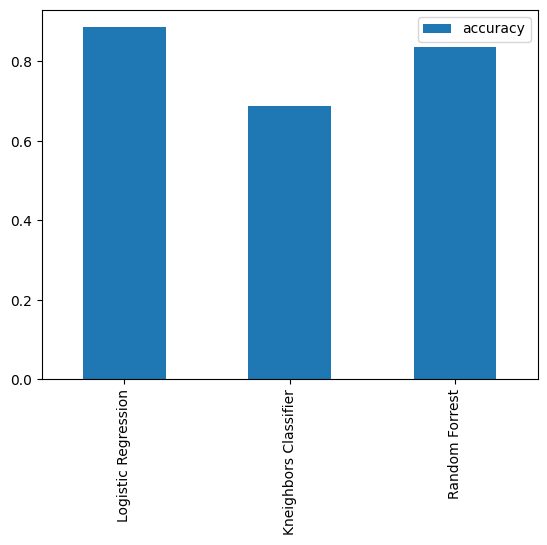

In [38]:
model_compare = pd.DataFrame(models_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.show()

Looking at the following to improve our model and make it more descriptive
- Hyperparameter tuning
- Feature Importance
- Confusion Matrix
- Cross-validation
- Precision
- Recall
- F1 Score
- Classification report
- ROC curve
- Area under curve(AUC)


### Hyperparameter tuning

In [39]:
#Let's tune KNN

train_score = {}
test_score = {}
n_neighbors = np.arange(1, 21, 1)
n_neighbors

for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_score[neighbor] = knn.score(X_train, y_train)
    test_score[neighbor] = knn.score(X_test, y_test)

In [40]:
#create a hyper parameter grid for logistic regression

log_reg_grid = { "C": np.logspace(-4, 4, 20), "solver": ["liblinear"] }

rf_grid = {"n_estimators": np.arange(10, 1000, 50), "max_depth": [None, 3, 5, 10], "min_samples_split": np.arange(2, 20, 2), "min_samples_leaf": np.arange(1, 20, 2)}

In [41]:
# Tune LogisticRegression

np.random.seed(42)

# setup random hyperparameter searach for logistic Regression using randomized search cv

rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, n_iter=20, cv=5, verbose=True)

# Fit random hyperparameter search moderl for LogisticRegression

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [42]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now doing for random forest classifier

In [43]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), cv=5, param_distributions=rf_grid, n_iter=20, verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [44]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [45]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [46]:
models_scores

{'Logistic Regression': 0.8852459016393442,
 'Kneighbors Classifier': 0.6885245901639344,
 'Random Forrest': 0.8360655737704918}

In [47]:
#Hyper parameter tuning with GridSearch SV for logistic regression

In [48]:
log_reg_grid = {"C" : np.logspace(-4, 4, 30), "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [49]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [50]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [51]:
models_scores

{'Logistic Regression': 0.8852459016393442,
 'Kneighbors Classifier': 0.6885245901639344,
 'Random Forrest': 0.8360655737704918}

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC Curve and AUC Curve
* Confusion Matrix
* Classification Matrix
* Precision
* Recall 
* F1-score

... and it would be great if cross-validation was used when possible

In [58]:
# Make prediction with tuned model

y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [53]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

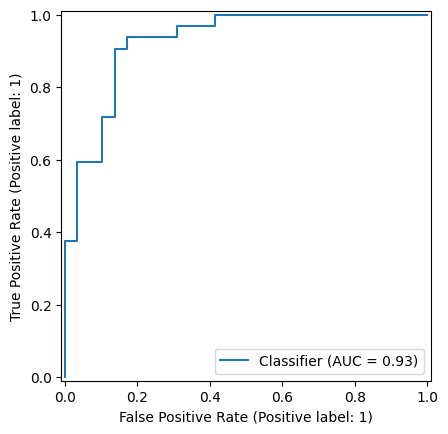

In [54]:
y_probs = gs_log_reg.predict_proba(X_test)[:, 1]

RocCurveDisplay.from_predictions(y_test, y_probs)
plt.show()

In [55]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [56]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [73]:
y_probs = gs_log_reg.predict_proba(X_test)[:, 1]


y_test.head()

179    0
228    0
111    1
246    0
60     1
Name: target, dtype: int64

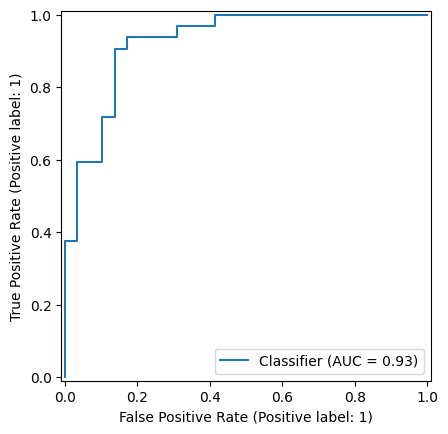

In [68]:
RocCurveDisplay.from_predictions(y_test, y_probs)
plt.show()

In [76]:
y_probs

array([0.13274734, 0.75591509, 0.81452423, 0.05469224, 0.88453361,
       0.8707029 , 0.6051218 , 0.00435981, 0.01376378, 0.56138477,
       0.71720794, 0.1190414 , 0.88730102, 0.06005038, 0.96750058,
       0.93181126, 0.96404699, 0.09452758, 0.01769764, 0.02646361,
       0.71543149, 0.02727603, 0.14274669, 0.71660797, 0.88198278,
       0.69480584, 0.84234244, 0.69335564, 0.0183094 , 0.87782367,
       0.07150763, 0.06684154, 0.01510285, 0.14314486, 0.60229474,
       0.12640328, 0.6633502 , 0.85079091, 0.81898325, 0.84121547,
       0.54515841, 0.79250829, 0.77817597, 0.70538841, 0.83243213,
       0.02113003, 0.7321637 , 0.93234387, 0.10276672, 0.06440754,
       0.13470662, 0.03554562, 0.80441972, 0.95312794, 0.31714651,
       0.00309601, 0.08734725, 0.93823575, 0.02813798, 0.01309874,
       0.06291748])

In [77]:
sns

<module 'seaborn' from '/Users/ashbh7/Desktop/ml-course/heart-disease-project/env/lib/python3.12/site-packages/seaborn/__init__.py'>

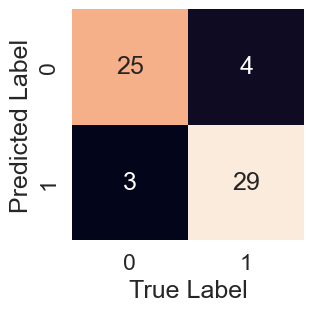

In [82]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """ Plots a nice looking confusion matrix using seaborn's heatmap()
    """

    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.show()

plot_conf_mat(y_test, y_preds)

## Now we've got roc curve and confusion matrix. Let get classification report as well as cross-validation prcision, recall and f1 score

In [83]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

In [84]:
#check best hyperparameter
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [85]:
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

In [88]:
#cross - validated accuracy

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [102]:
# using function to find different cross validation methods

def get_scoring(scoring, cv):
     cv_scoring = cross_val_score(clf, X, y, cv=cv, scoring=scoring)
     cv_scoring_mean = np.mean(cv_scoring)
     print(f" The average {cv} cross validation {scoring} of this model is {cv_scoring_mean}")
     return cv_scoring_mean

cv_accuracy = get_scoring("accuracy", 5)
cv_precision = get_scoring("precision", 5)
cv_recall = get_scoring("recall", 5)
cv_f1 = get_scoring("f1", 5)

 The average 5 cross validation accuracy of this model is 0.8446994535519124
 The average 5 cross validation precision of this model is 0.8207936507936507
 The average 5 cross validation recall of this model is 0.9212121212121213
 The average 5 cross validation f1 of this model is 0.8673007976269721


In [106]:
# visualize our cross validation matrix

cv_metrices = pd.DataFrame({"Accuracy" : cv_accuracy,
                            "Precision" : cv_precision,
                            "Recall" : cv_recall,
                            "F1 Score": cv_f1},
                          index=[0])
cv_metrices

,Accuracy,Precision,Recall,F1 Score
0,0.844699,0.820794,0.921212,0.867301


/var/folders/7z/zb8bcthj367315vply4w87h00000gn/T/ipykernel_16298/1004920169.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Score", data=cv_metrices_melted, palette="viridis", ax=ax)


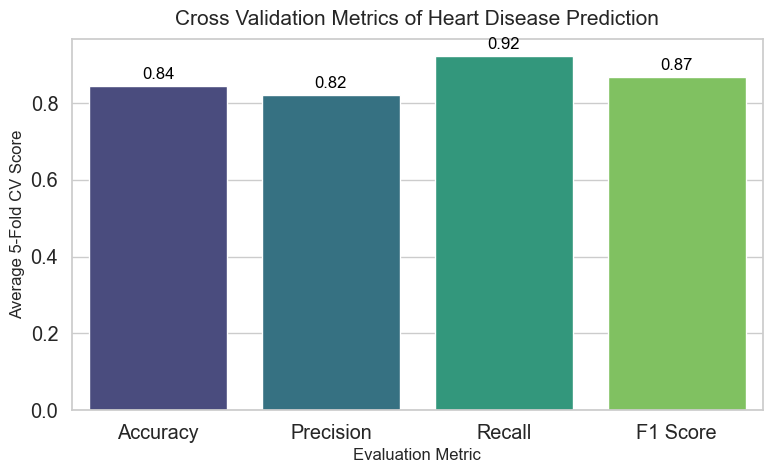

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare your melted dataframe
cv_metrices_melted = cv_metrices.T.reset_index()
cv_metrices_melted.columns = ["Metric", "Score"]

# Seaborn style
sns.set(style="whitegrid", font_scale=1.3)

# Create figure and axes (object-oriented way)
fig, ax = plt.subplots(figsize=(8, 5))

# Create barplot
sns.barplot(x="Metric", y="Score", data=cv_metrices_melted, palette="viridis", ax=ax)

# Add annotations above bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="bottom", fontsize=12, color="black",
                xytext=(0, 3), textcoords="offset points")

# Set titles and labels
ax.set_title("Cross Validation Metrics of Heart Disease Prediction", fontsize=15, pad=10)
ax.set_xlabel("Evaluation Metric", fontsize=12)
ax.set_ylabel("Average 5-Fold CV Score", fontsize=12)
ax.set_ylim(0, 1)

# Improve layout and show
fig.tight_layout()
plt.show()

### Feature importance 

Feature importance is another way of asking like which feature helped in making our model better and useful. Simply it means that which characterstics of our data contributed in the outcomes of the different result.

In [128]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [129]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [137]:
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")
clf.fit(X_train, y_train)

clf_pred = clf.predict(X_test)
clf_pred_accuracy = accuracy_score(y_test, clf_pred)

print(clf_pred_accuracy)

0.8852459016393442


In [144]:
coefficient = clf.coef_[0]


oddsRatios = np.exp(coefficient)
oddsRatios

array([1.0031723 , 0.42297336, 1.93609026, 0.98849674, 0.99833764,
       1.04483734, 1.36719077, 1.02489853, 0.54654942, 0.56630168,
       1.56912198, 0.52935354, 0.50832527])

In [150]:
feature_importance = pd.DataFrame({"Features": X.columns, "Coefficient": coefficient, "OddRatios" : oddsRatios})
feature_importance

,Features,Coefficient,OddRatios
0,age,0.003167,1.003172
1,sex,-0.860446,0.422973
2,cp,0.660671,1.936090
3,trestbps,-0.011570,0.988497
4,chol,-0.001664,0.998338
5,fbs,0.043861,1.044837
6,restecg,0.312758,1.367191
7,thalach,0.024594,1.024899
8,exang,-0.604131,0.546549
9,oldpeak,-0.568628,0.566302


In [152]:
feature_dict = dict(zip(X.columns, list(coefficient)))
feature_dict

{'age': np.float64(0.003167275089699386),
 'sex': np.float64(-0.8604460790279196),
 'cp': np.float64(0.6606706096352647),
 'trestbps': np.float64(-0.011569931632461184),
 'chol': np.float64(-0.0016637421222612918),
 'fbs': np.float64(0.04386121661621614),
 'restecg': np.float64(0.3127580999617399),
 'thalach': np.float64(0.024593609694095107),
 'exang': np.float64(-0.6041305389202294),
 'oldpeak': np.float64(-0.5686283368137661),
 'slope': np.float64(0.45051621167145023),
 'ca': np.float64(-0.6360987581158484),
 'thal': np.float64(-0.6766337397805393)}

In [154]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Visualize feature importance 

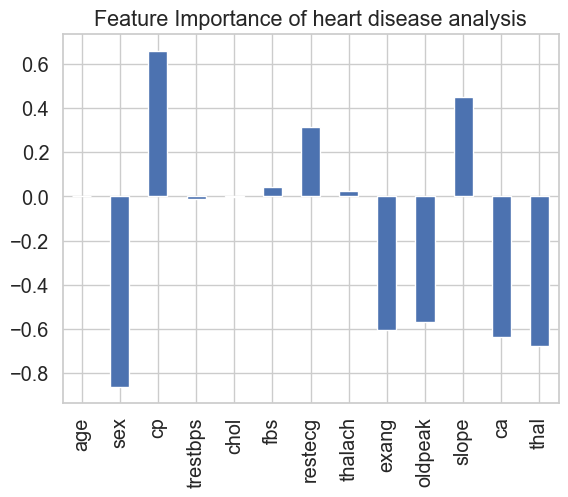

In [161]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance of heart disease analysis", legend=False)
plt.show()

In [165]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [166]:
24/72

0.3333333333333333

In [167]:
114/93

1.2258064516129032

In [168]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
